In [373]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

In [2]:
path = '../data/lemon_haze_18.csv'
test_path = '../data/test_shard.csv'

In [396]:
from convert_to_time_series import TimeSeriesData

In [356]:
lemon_haze = TimeSeriesData(path)

In [357]:
%time lemon_haze.construct_tables()

CPU times: user 135 ms, sys: 75.7 ms, total: 211 ms
Wall time: 276 ms


In [358]:
raw = lemon_haze.raw_df
inv = lemon_haze.by_inv_id
ts = lemon_haze.time_series
bl = lemon_haze._bool_matrix
sls = lemon_haze._sales_matrix
dts = lemon_haze._date_idx

In [360]:
bl.shape, sls.shape, ts.shape

((1112, 2514), (2514, 2), (1112, 2))

In [361]:
ts.describe()

,ttl_sales,ttl_gross_profit
count,1112.000000,1112.000000
mean,1620.733130,827.516971
std,1408.668914,871.934455
min,28.815603,-6224.918215
25%,497.311312,265.922448
50%,1479.852908,780.513933
75%,2366.044298,1182.099121
max,15165.420750,10259.691156


In [368]:
ts[ts['ttl_sales'] > 5000]

,ttl_sales,ttl_gross_profit
2014-08-01,12397.920750,8372.191156
2014-08-02,15165.420750,10259.691156
2014-08-03,10867.990750,7370.261156
2014-08-04,13652.055750,9274.326156
2014-08-05,10884.555750,7386.826156
2014-08-06,5349.555750,3611.826156
2014-09-13,6512.748225,4765.073196
2014-09-14,6512.748225,4765.073196
2014-09-15,6512.748225,4765.073196
2014-09-16,6512.748225,4765.073196


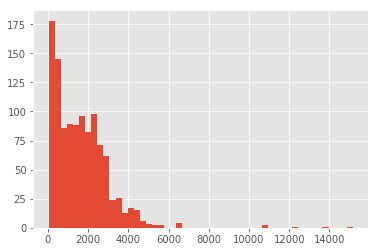

In [372]:
plt.hist(ts['ttl_sales'], bins=50)
plt.show()

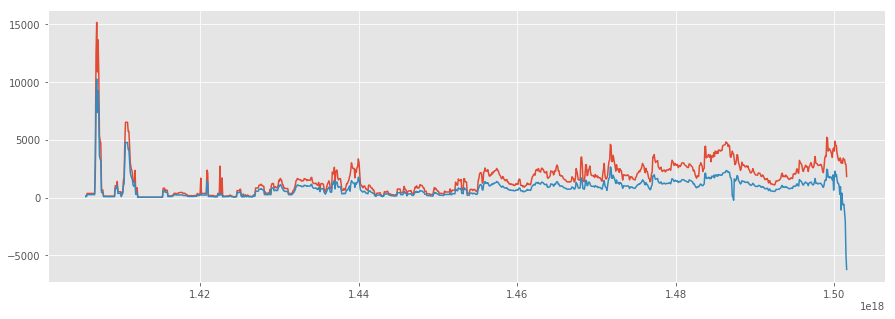

In [379]:
fig, ax = plt.subplots(figsize=(15,5))

plt.plot(ts.index, ts['ttl_sales'])
plt.plot(ts.index, ts['ttl_gross_profit'])
plt.show()

In [283]:
bl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1112 entries, 0 to 1111
Columns: 2514 entries, 0 to 2513
dtypes: bool(2514)
memory usage: 2.7 MB


In [284]:
sls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2514 entries, 0 to 2513
Data columns (total 2 columns):
0    2513 non-null float64
1    2513 non-null float64
dtypes: float64(2)
memory usage: 39.4 KB


In [285]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1112 entries, 2014-07-17 to 2017-08-01
Freq: D
Data columns (total 2 columns):
ttl_sales           0 non-null float64
ttl_gross_profit    0 non-null float64
dtypes: float64(2)
memory usage: 26.1 KB


In [388]:
start_dates = np.array([22, 22, 23, 24, 25, 26,])
dates_index = np.array([21, 22, 23, 24]).reshape(len(dates_index), 1)

In [389]:
dates_tile = np.broadcast_to(dates_index, (len(dates_index), len(start_dates)))
dates_tile

array([[21, 21, 21, 21, 21, 21],
       [22, 22, 22, 22, 22, 22],
       [23, 23, 23, 23, 23, 23],
       [24, 24, 24, 24, 24, 24]])

In [392]:
result = dates_tile >= start_dates

In [393]:
result

array([[False, False, False, False, False, False],
       [ True,  True, False, False, False, False],
       [ True,  True,  True, False, False, False],
       [ True,  True,  True,  True, False, False]], dtype=bool)

In [424]:
test_broadcasting = TimeSeriesData(path)

In [425]:
test_broadcasting._construct_by_inv_id()
test_broadcasting._construct_date_idx()

In [430]:
%timeit -n100 test_broadcasting._construct_bool_matrix_take_two()

100 loops, best of 3: 16.5 ms per loop


In [431]:
%timeit -n100 test_broadcasting._construct_bool_matrix()

100 loops, best of 3: 42.9 ms per loop


In [426]:
test_broadcasting._construct_bool_matrix_take_two()
test_broadcasting._construct_bool_matrix()

In [427]:
B = test_broadcasting._bool_matrix

In [428]:
A = test_broadcasting._bool_matrixA

In [429]:
A.equals(B)

True

In [432]:
A.shape

(1112, 2514)